In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    return np.array([2 * x, 2 * y])

def gradient_descent(x0, y0, learning_rate, num_iterations):
    x, y = x0, y0
    history = []
    for _ in range(num_iterations):
        grad = grad_f(x, y)
        x -= learning_rate * grad[0]
        y -= learning_rate * grad[1]
        history.append((x, y, f(x, y)))
    return history

def stochastic_gradient_descent(x0, y0, learning_rate, num_iterations):
    x, y = x0, y0
    history = []
    for _ in range(num_iterations):
        grad = grad_f(x, y) + np.random.normal(0, 0.1, size=2)  # Add noise for stochasticity
        x -= learning_rate * grad[0]
        y -= learning_rate * grad[1]
        history.append((x, y, f(x, y)))
    return history

def momentum_gradient_descent(x0, y0, learning_rate, num_iterations, momentum=0.9):
    x, y = x0, y0
    vx, vy = 0, 0  # Velocity
    history = []
    for _ in range(num_iterations):
        grad = grad_f(x, y)
        vx = momentum * vx - learning_rate * grad[0]
        vy = momentum * vy - learning_rate * grad[1]
        x += vx
        y += vy
        history.append((x, y, f(x, y)))
    return history

def adam_optimizer(x0, y0, learning_rate, num_iterations, beta1=0.9, beta2=0.999, epsilon=1e-8):
    x, y = x0, y0
    m = np.array([0, 0])  # First moment (mean)
    v = np.array([0, 0])  # Second moment (uncentered variance)
    history = []
    for t in range(1, num_iterations + 1):
        grad = grad_f(x, y)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        x -= learning_rate * m_hat[0] / (np.sqrt(v_hat[0]) + epsilon)
        y -= learning_rate * m_hat[1] / (np.sqrt(v_hat[1]) + epsilon)
        history.append((x, y, f(x, y)))
    return history

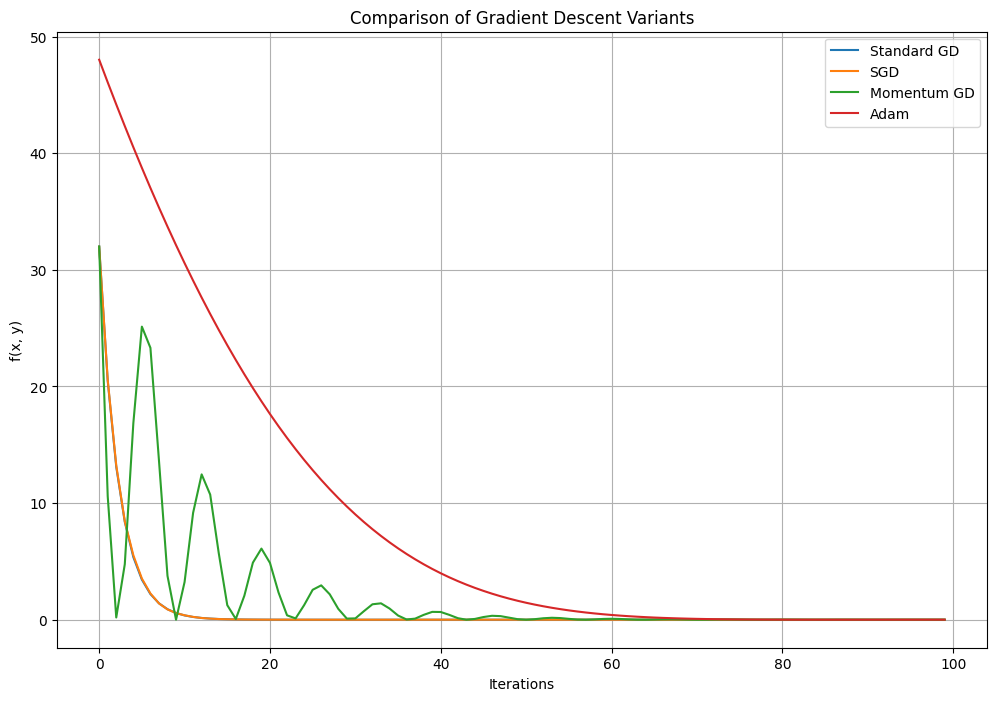

In [3]:
x0, y0 = 5.0, 5.0  
learning_rate = 0.1
num_iterations = 100

gd_history = gradient_descent(x0, y0, learning_rate, num_iterations)
sgd_history = stochastic_gradient_descent(x0, y0, learning_rate, num_iterations)
momentum_history = momentum_gradient_descent(x0, y0, learning_rate, num_iterations)
adam_history = adam_optimizer(x0, y0, learning_rate, num_iterations)

plt.figure(figsize=(12, 8))
plt.plot([f(x, y) for x, y, _ in gd_history], label="Standard GD")
plt.plot([f(x, y) for x, y, _ in sgd_history], label="SGD")
plt.plot([f(x, y) for x, y, _ in momentum_history], label="Momentum GD")
plt.plot([f(x, y) for x, y, _ in adam_history], label="Adam")
plt.xlabel("Iterations")
plt.ylabel("f(x, y)")
plt.title("Comparison of Gradient Descent Variants")
plt.legend()
plt.grid()
plt.show()